# TASK #1: PROJECT OVERVIEW 


**• Traffic sign classification is an important task for self driving cars.**

**• In this project, we will train a Deep Convolutional Neural Network (CNN) to classify traffic sign images.**

**• The dataset contains 43 different classes of images.**

**INPUTS AND OUTPUTS**

• The dataset consists of 43 different classes

• Images are 32 x 32 pixels

• Colored images consist of 3 GB channels for red, green, and blue colors

# TASK #2: IMPORT LIBRARIES/DATASETS

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

# DIVIDING DATASET INTO TRAINING, VALIDATION AND TESTING

• Dataset is divided to 80% for training and 20% for testing.

• Sometimes, data is divided to 60%, 20%, 20% segments for training, validation, and testing.

1. Training set: used for gradient calculation & weight update.

2. Validation set:

   • Used for cross-validation which is performed to assess

    training quality as training proceeds.

   • Cross-validation is used to overcome over-fitting which 

    occurs when algorithm focuses on training set details at

    cost of losing generalization ability.
    
3. Testing set: used for testing trained network.

In [3]:
with open("traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train, y_train = train["features"], train["labels"]
X_validation, y_validation = valid["features"], valid["labels"]
X_test, y_test = test["features"], test["labels"]

In [5]:
X_train.shape

(34799, 32, 32, 3)

In [6]:
y_train.shape

(34799,)

# TASK #3: PERFORM IMAGES VISUALIZATION

26

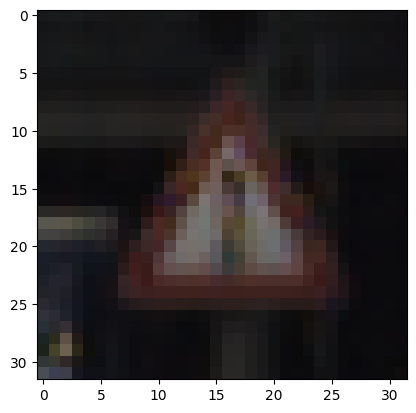

In [7]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

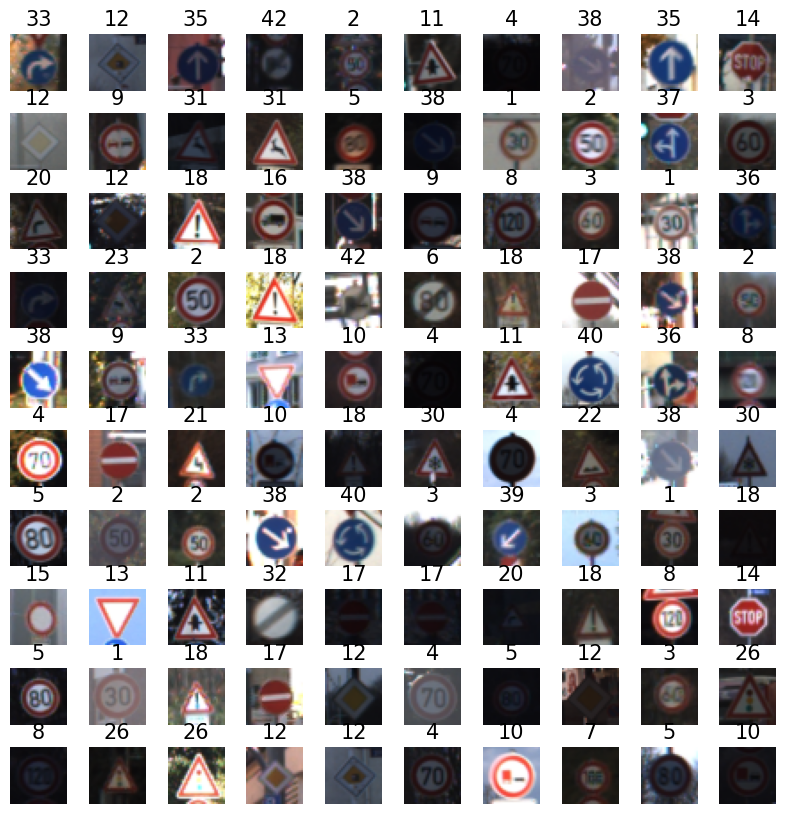

In [8]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0, W_grid * L_grid):
    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis("off")

plt.subplots_adjust(hspace = 0.4)    

        

# TASK #4: CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [9]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [10]:
X_train_gray = np.sum(X_train/3 , axis = 3, keepdims = True )
X_valid_gray = np.sum(X_validation/3 , axis = 3, keepdims = True )
X_test_gray = np.sum(X_test/3 , axis = 3, keepdims = True )

In [11]:
X_train_gray.shape

(34799, 32, 32, 1)

In [12]:
X_train_gray_norm = (X_train_gray - 128)/128
X_valid_gray_norm = (X_valid_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128

In [13]:
X_train_gray_norm

array([[[[ 0.875     ],
         [ 0.9921875 ],
         [ 0.9921875 ],
         ...,
         [ 0.9921875 ],
         [ 0.9921875 ],
         [ 0.9921875 ]],

        [[ 0.921875  ],
         [ 0.9921875 ],
         [ 0.9921875 ],
         ...,
         [ 0.9921875 ],
         [ 0.9921875 ],
         [ 0.9921875 ]],

        [[ 0.84375   ],
         [ 0.9921875 ],
         [ 0.9921875 ],
         ...,
         [ 0.9921875 ],
         [ 0.9921875 ],
         [ 0.9921875 ]],

        ...,

        [[-0.84635417],
         [-0.83333333],
         [-0.80989583],
         ...,
         [ 0.94791667],
         [ 0.95833333],
         [ 0.96875   ]],

        [[-0.82552083],
         [-0.77864583],
         [-0.71875   ],
         ...,
         [ 0.97395833],
         [ 0.984375  ],
         [ 0.98697917]],

        [[-0.71614583],
         [-0.671875  ],
         [-0.5859375 ],
         ...,
         [ 0.50520833],
         [-0.11979167],
         [-0.1640625 ]]],


       [[[ 0.93229167],


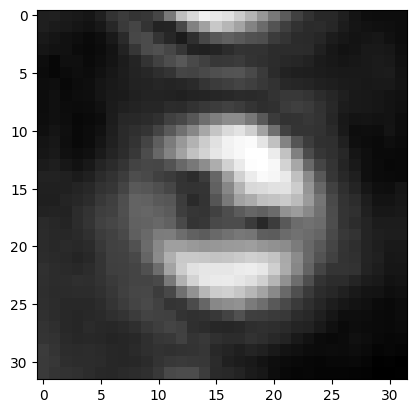

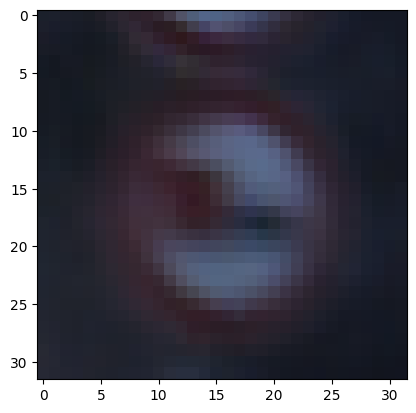

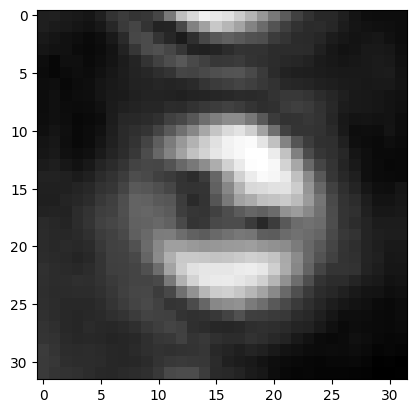

In [14]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS 

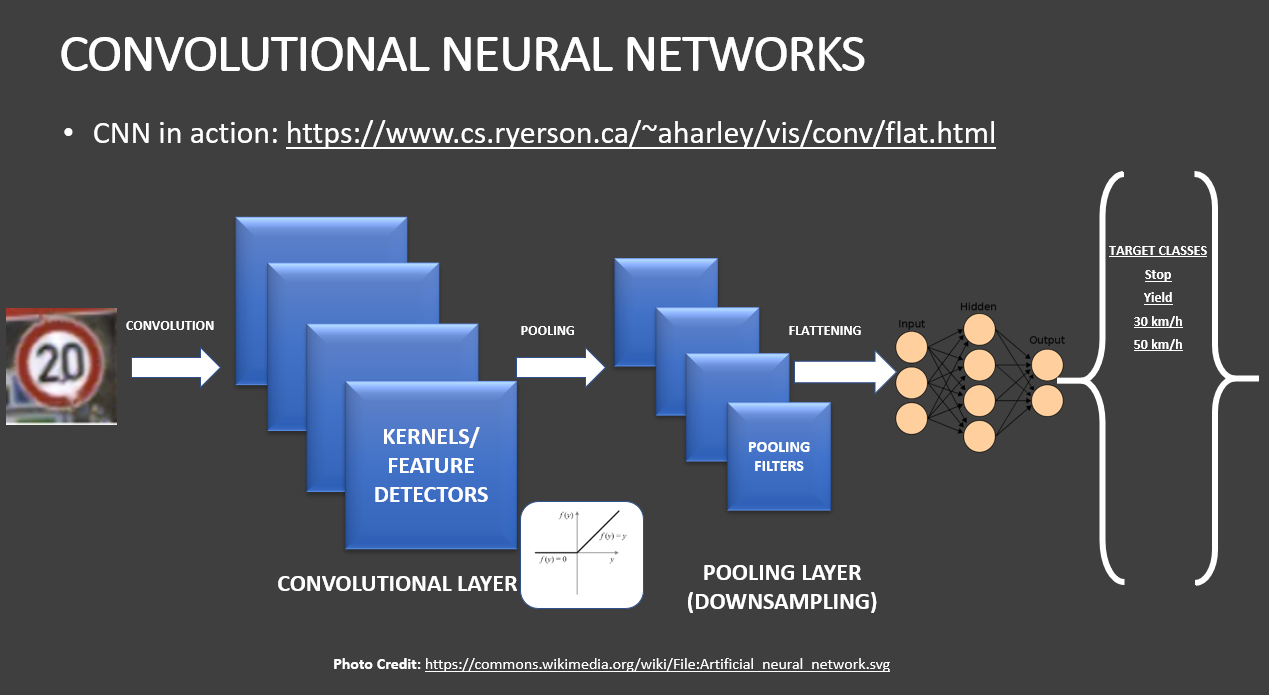

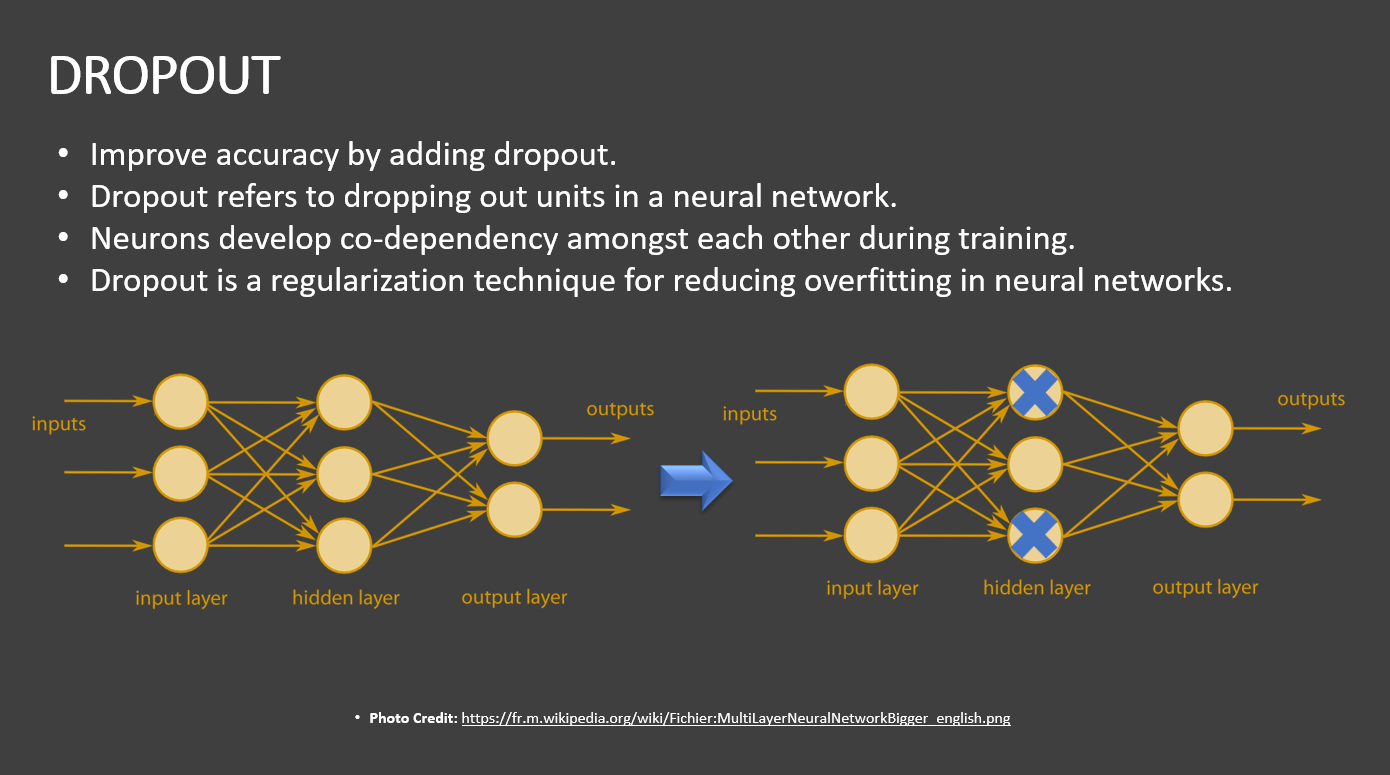

# TASK #6: BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [15]:
# import tensorflow as tf

# tf.config.run_functions_eagerly(True)

from tensorflow.keras import datasets, layers, models

In [16]:
CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16, (5, 5), activation='relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation='relu'))
CNN.add(layers.Dense(84, activation='relu'))
CNN.add(layers.Dense(43, activation='softmax'))

CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 dropout (Dropout)           (None, 14, 14, 6)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 400)               0

# TASK #7: COMPILE AND TRAIN DEEP CNN MODEL

In [17]:
CNN.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = CNN.fit(X_train_gray_norm,
                  y_train,
                  batch_size = 500,
                  epochs = 25,
                  verbose = 1,
                  validation_data=(X_valid_gray_norm, y_validation))

Epoch 1/25
70/70 [==============================] - 17s 215ms/step - loss: 3.2761 - accuracy: 0.1419 - val_loss: 2.9126 - val_accuracy: 0.2660
Epoch 2/25
70/70 [==============================] - 18s 252ms/step - loss: 1.9745 - accuracy: 0.4585 - val_loss: 1.5200 - val_accuracy: 0.5773
Epoch 3/25
70/70 [==============================] - 22s 310ms/step - loss: 1.1538 - accuracy: 0.6680 - val_loss: 1.0070 - val_accuracy: 0.7181
Epoch 4/25
70/70 [==============================] - 21s 298ms/step - loss: 0.8305 - accuracy: 0.7603 - val_loss: 0.8386 - val_accuracy: 0.7478
Epoch 5/25
70/70 [==============================] - 22s 313ms/step - loss: 0.6686 - accuracy: 0.8115 - val_loss: 0.7223 - val_accuracy: 0.7912
Epoch 6/25
70/70 [==============================] - 18s 256ms/step - loss: 0.5698 - accuracy: 0.8384 - val_loss: 0.6748 - val_accuracy: 0.8231
Epoch 7/25
70/70 [==============================] - 21s 293ms/step - loss: 0.4992 - accuracy: 0.8575 - val_loss: 0.6531 - val_accuracy: 0.8132

# TASK #8: ASSESS TRAINED CNN MODEL PERFORMANCE 

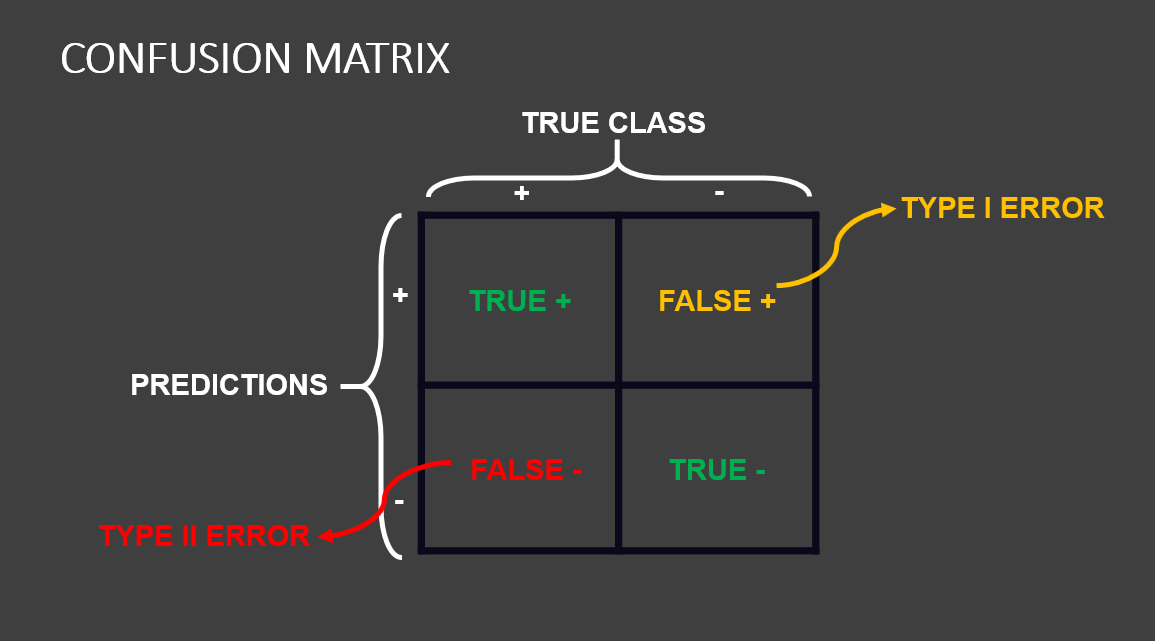

In [19]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 3s 9ms/step - loss: 0.7092 - accuracy: 0.8787
Test Accuracy: 0.8787015080451965


In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

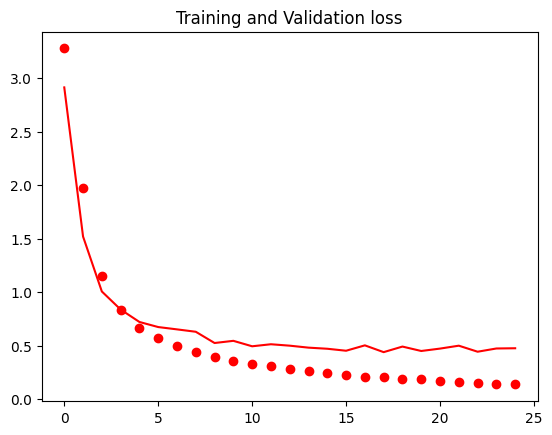

In [22]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, "ro", label = "Training Loss")
plt.plot(epochs, val_loss, "r", label = "Validation Loss")
plt.title('Training and Validation loss')

Text(0.5, 1.0, 'Training and Validation accuracy')

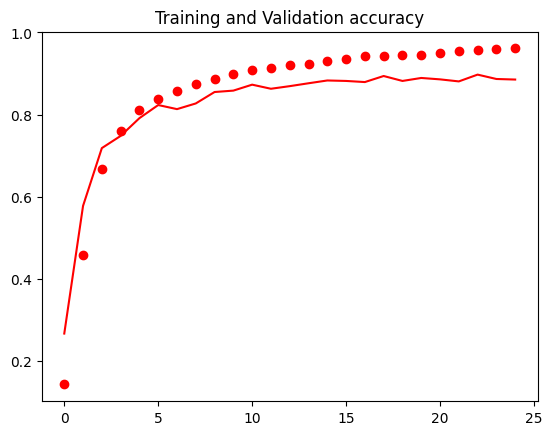

In [23]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, "ro", label = "Training accuracy")
plt.plot(epochs, val_accuracy, "r", label = "Validation accuracy")
plt.title('Training and Validation accuracy')

395/395 [==============================] - 4s 9ms/step


<Axes: >

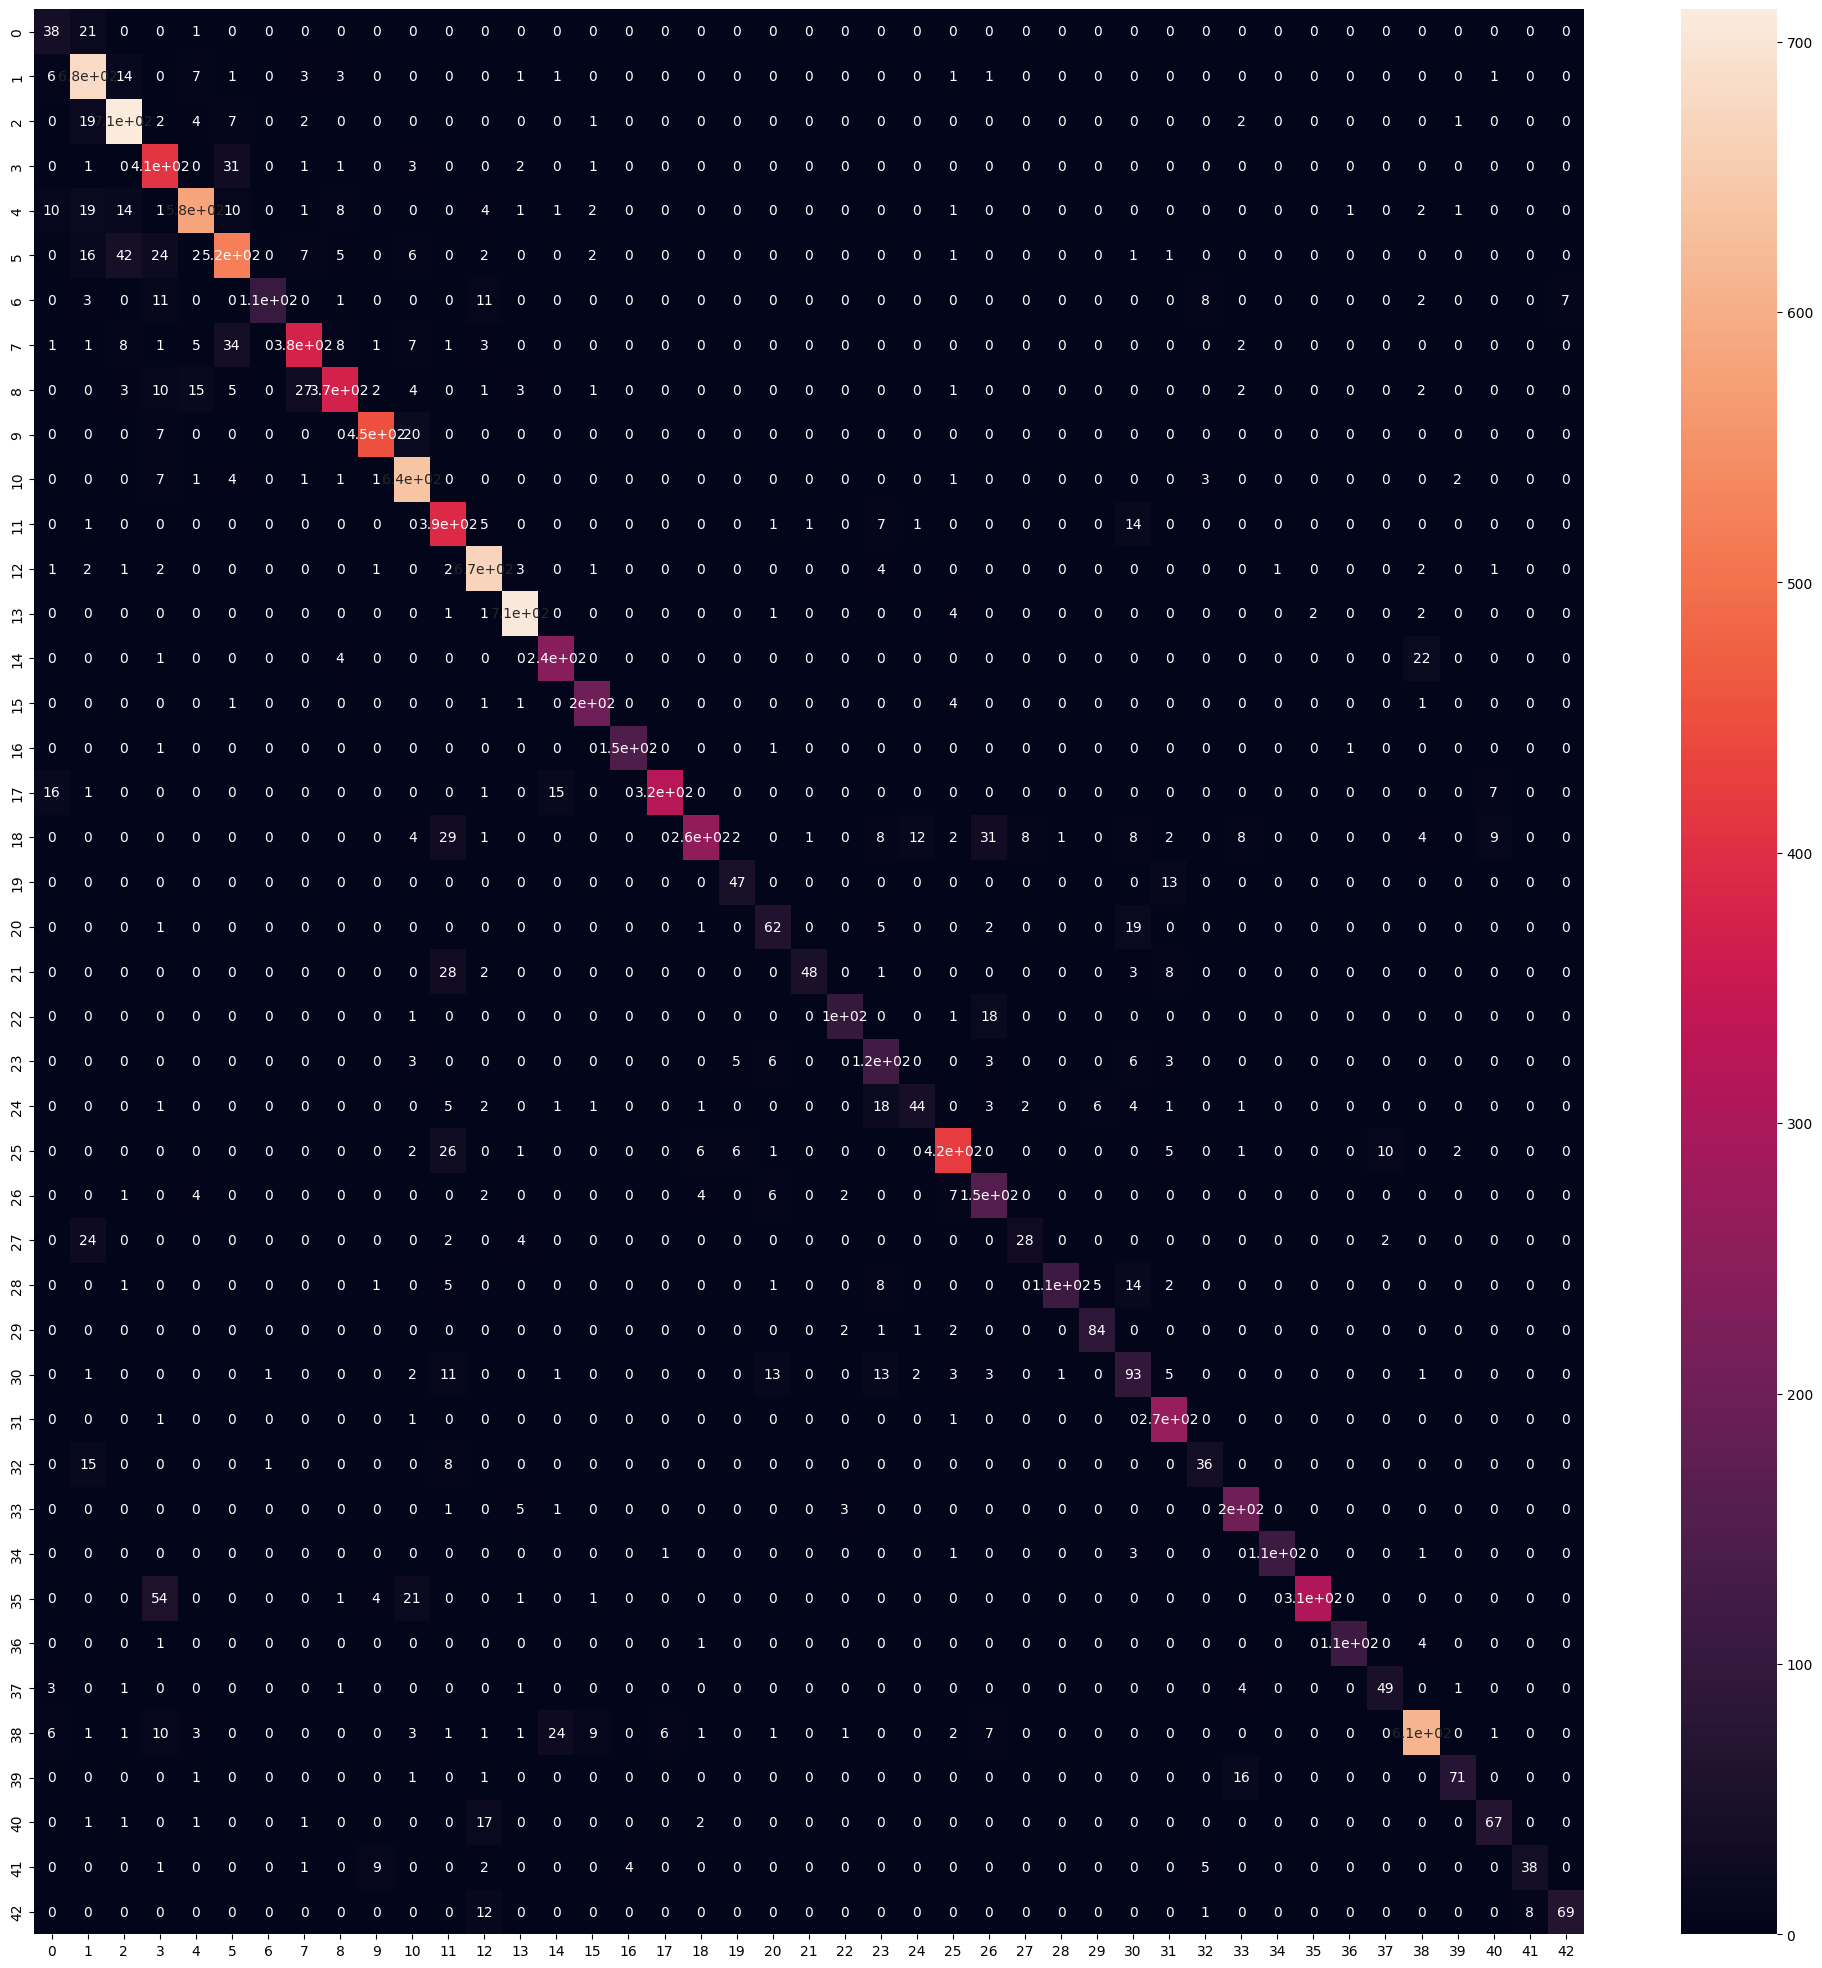

In [24]:
predicted_probabilities = CNN.predict(X_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_probabilities.argmax(axis=1))
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

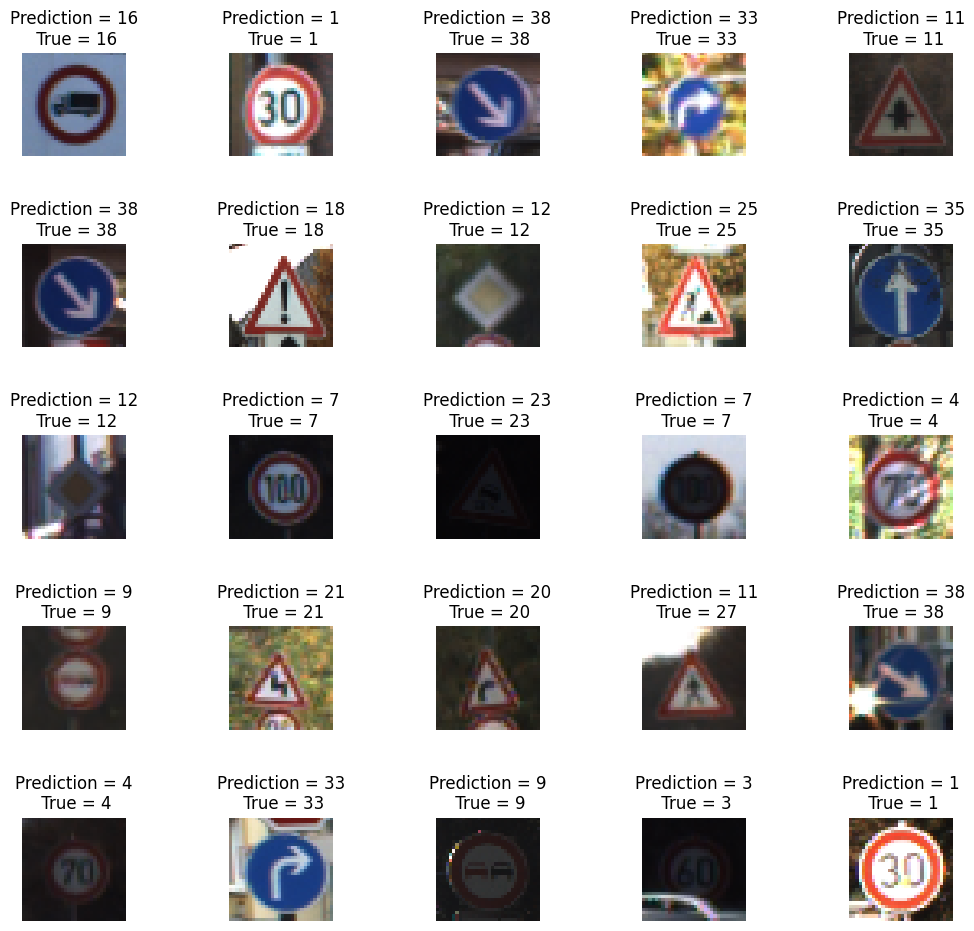

In [25]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_probabilities.argmax(axis=1)[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)      

# CONGRATULATIONS ON FINISHING THE PROJECT!

# APPENDIX

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }